<a href="https://colab.research.google.com/github/Anannyyya/python_examples/blob/master/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import pandas as pd
df = pd.read_csv("crop_yield_data.xls")  # Replace with the actual file name
print(df.head())  # Display the first few rows
X = df.drop('crop_yield', axis=1)
y = df['crop_yield']

   temperature  humidity  rainfall  soil_quality  fertilizer_used  crop_yield
0           25        60        50             7              200        2000
1           28        65        60             6              220        2200
2           24        58        40             8              180        1800
3           26        62        55             7              210        2100
4           22        59        45             6              190        1900


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # For regression output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4506740.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4506598.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 4506458.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 4506322.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4506185.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4506050.5000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4505920.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 4505793.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4505666.5000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4505539.5000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4505414.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4505287.5000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4505160.5000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4505032.5000
Epo

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 5240703.0000
Test Loss: 5240703.0


LAB 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Load Dataset
data = pd.read_csv("climate data.csv")

In [5]:
# Select features (X) and target variable (y)
X = data.drop(columns=["co2_levels"])
y = data["co2_levels"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 5. Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# 6. Build the FNN Model
# a. Initialize the model
model = Sequential()

# b. Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# c. Hidden layers
model.add(Dense(1, activation='linear'))  # Use 'sigmoid' or 'softmax' for classification tasks

# d. Output layer (for regression tasks)
model.add(Dense(1, activation='linear'))  # Use 'sigmoid' or 'softmax' for classification tasks

# e. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 7. Train the Model

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use part of the training set for validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 160741.0312 - mae: 397.7028 - val_loss: 153238.5469 - val_mae: 388.2574
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 148288.9844 - mae: 381.6781 - val_loss: 124991.2578 - val_mae: 349.8943
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 114446.7031 - mae: 333.7274 - val_loss: 74392.2812 - val_mae: 267.2636
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62343.5625 - mae: 241.7098 - val_loss: 27970.4570 - val_mae: 155.7411
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21334.5449 - mae: 131.8102 - val_loss: 8211.1055 - val_mae: 75.6187
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7229.5244 - mae: 69.3510 - val_loss: 4870.8398 - val_mae: 56.1506
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4719.1157 - mae: 55.0446 - val_loss: 4487.8052 - val_mae: 53.4580
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4471.9375 - mae: 53.5869 - val_loss

In [11]:
# 8. Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2685.7703 - mae: 41.6045
Test Loss: 2741.86181640625, Test MAE: 41.979393005371094


In [12]:
# 9. Make Predictions
predictions = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [13]:
# 10. Display the first few predictions
print("Predictions:", predictions[:5])
print("Actual Values:", y_test[:5].values)

Predictions: [[397.939  ]
 [403.7662 ]
 [403.0087 ]
 [397.71768]
 [402.5421 ]]
Actual Values: [400.58610745 379.68918717 417.64682709 457.96647992 382.95233286]


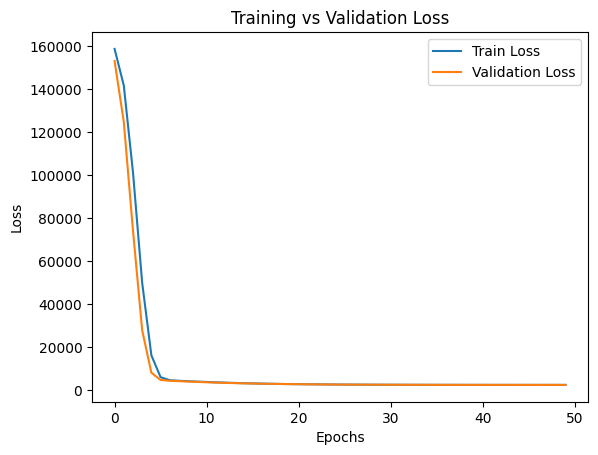

In [14]:
# 11. Visualize Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()